# Opencv Tutorial Part 2

In this second part of the tutorial we use a little more advance 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def plot_image(image):
    #cv2.imwrite('res.png',img_rgb)
    fig = plt.figure(figsize=(10, 10))
    #b,g,r = cv2.split(image)
    #image = cv2.merge([r,g,b])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

In [4]:
IMAGE_DIR = './images/'

## Pattern matching

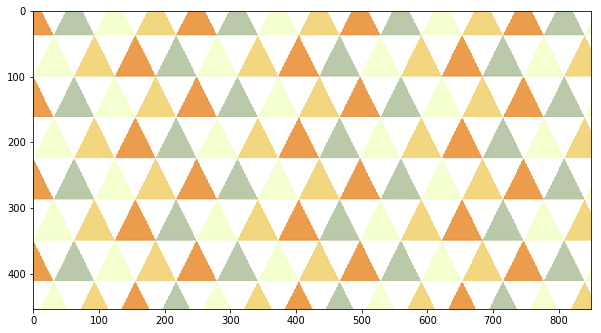

In [5]:
img = cv2.imread(IMAGE_DIR+'triangles.jpg')
plot_image(img)

we are searching for all organge triangles inside the image. Therefor we have to  create a template.

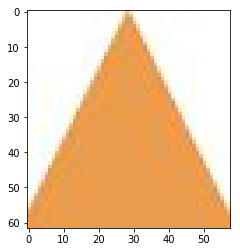

In [6]:
#template that is searched
template = cv2.imread(IMAGE_DIR+'triangle.jpg')
img_temp = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
plt.imshow(img_temp)


In [7]:
#get width and heigth of template (only for bounding rectangles)
w, h, _ = template.shape

#search for template inside the image, only if threshold >= 0.98 than 
#its accepted as match
res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)

threshold = 0.98
loc = np.where( res >= threshold)

#draw a rectangle for every match in the image, 
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

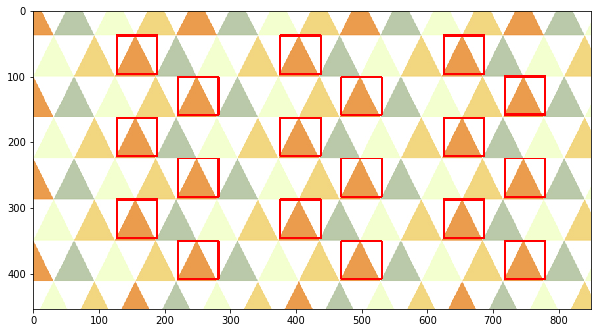

In [8]:
plot_image(img)

## Color filter

In [9]:
img = cv2.imread(IMAGE_DIR+'positive-possum.png')

In [10]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
lower_brown = np.array([5,20,50])
upper_brown = np.array([30,150,200])
    
mask = cv2.inRange(hsv, lower_brown, upper_brown)
res = cv2.bitwise_and(img,img, mask= mask)

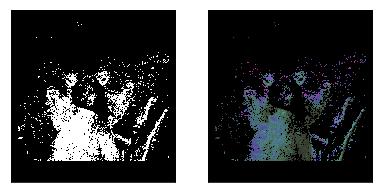

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 3, 1, xticks=[], yticks=[])
plt.imshow(mask, cmap='gray' )

ax = fig.add_subplot(1, 3, 2, xticks=[], yticks=[])
res = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)
plt.imshow(res )

plt.show()

## Filter 

### Sobel 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


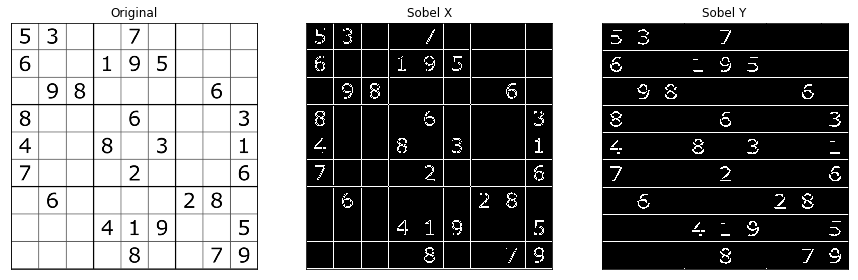

In [47]:
img = cv2.imread(IMAGE_DIR+'sudo.jpg')

img = cv2.GaussianBlur(img, (5, 5), 0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

plt.figure(figsize=(15, 15))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(laplacian,cmap = 'gray')
#plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
#plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()